In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
%matplotlib inline
sns.set_style("dark")

## Preparing the Dataset

In [36]:
df=pd.read_csv('NBA_player_of_the_week.csv')
df.head()

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [37]:
df.describe()

,Age,Draft Year,Season short,Seasons in league,Real_value
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,0.667686
std,3.402354,9.381369,9.426976,3.271995,0.236163
min,19.000000,1969.000000,1985.000000,0.000000,0.500000
25%,24.000000,1990.000000,1997.000000,3.000000,0.500000
50%,26.000000,1998.000000,2006.000000,6.000000,0.500000
75%,29.000000,2004.000000,2012.000000,8.000000,1.000000
max,40.000000,2016.000000,2018.000000,17.000000,1.000000


In [38]:
df_data=df.iloc[:,:13]
df_data.columns=['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player', 'Position', 'Season', 
                 'Season Short', 'Seasons in League', 'Team', 'Weight', 'Real Value']
df_data

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season Short,Seasons in League,Team,Weight,Real Value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,"Mar 10, 1985",1980,6-4,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,"Mar 3, 1985",1982,6-3,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,"Feb 24, 1985",1981,6-6,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,"Feb 17, 1985",1979,6-9,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,"Feb 3, 1985",1982,6-7,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


In [71]:
NBA_closeup=df_data[[ 'Age', 'Draft Year','Height','Player', 'Position', 'Seasons in League', 'Weight']]
NBA_closeup
#Categorical Variable - Player, Position
#Continuous Variable - Age, Season in League, Weight, Draft Year, Height

,Age,Draft Year,Height,Player,Position,Seasons in League,Weight
0,29,1978,6-5,Micheal Ray Richardson,PG,6,189
1,23,1982,6-6,Derek Smith,SG,2,205
2,28,1979,6-6,Calvin Natt,F,5,220
3,37,1969,7-2,Kareem Abdul-Jabbar,C,15,225
4,28,1978,6-9,Larry Bird,SF,5,220
5,26,1980,6-4,Darrell Griffith,SG,4,190
6,24,1982,6-3,Sleepy Floyd,PG,2,170
7,25,1981,6-6,Mark Aguirre,SF,3,232
8,25,1979,6-9,Magic Johnson,PG,5,255
9,25,1982,6-7,Dominique Wilkins,SF,2,200


In [72]:
def convert_to_lb(item):
    h="".join(list(item)[:-2])
    a=int(h)/0.45359237
    return a
weight_lb=NBA_closeup['Weight'].apply(lambda x: convert_to_lb(x) if 'kg'in x else int(x))
def remove_cm(item):
    h="".join(list(item)[:-2])
    return int(h)
def convert_Height(item):
    a=int(item.split('-')[0])
    b=int(item.split('-')[1])
    h=a*30.48+b*2.54
    return h
height_cm=NBA_closeup['Height'].apply(lambda x: convert_Height(x) if '-' in x else remove_cm(x))

In [73]:
NBA_closeup['weight_lb']=weight_lb
NBA_closeup['height_cm']=height_cm
NBA_closeup.tail(15)
#Dataset is now cleaned for feature engineering.

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Draft Year,Height,Player,Position,Seasons in League,Weight,weight_lb,height_cm
1130,29,2007,206cm,Kevin Durant,SF,10,109kg,240.303866,206.0
1131,33,2003,203cm,LeBron James,F,14,113kg,249.122356,203.0
1132,28,2009,196cm,James Harden,SG,8,100kg,220.462262,196.0
1133,31,2008,191cm,Goran Dragic,G,9,86kg,189.597545,191.0
1134,24,2012,208cm,Anthony Davis,PF,5,115kg,253.531602,208.0
1135,28,2009,201cm,DeMar DeRozan,GF,8,100kg,220.462262,201.0
1136,22,2015,213cm,Karl-Anthony Towns,C,2,111kg,244.713111,213.0
1137,25,2011,206cm,Tobias Harris,F,6,107kg,235.894621,206.0
1138,23,2014,208cm,Nikola Jokic,C,2,113kg,249.122356,208.0
1139,22,2015,221cm,Kristaps Porzingis,FC,2,109kg,240.303866,221.0


## Univariate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa45be0>,
      dtype=object)

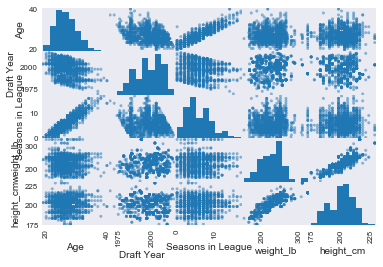

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(NBA_closeup)

                        Age  Draft Year  Seasons in League  weight_lb  \
Age                1.000000   -0.347512           0.886507  -0.022070   
Draft Year        -0.347512    1.000000          -0.140436   0.027979   
Seasons in League  0.886507   -0.140436           1.000000   0.053703   
weight_lb         -0.022070    0.027979           0.053703   1.000000   
height_cm          0.030844   -0.116083           0.047575   0.840075   

                   height_cm  
Age                 0.030844  
Draft Year         -0.116083  
Seasons in League   0.047575  
weight_lb           0.840075  
height_cm           1.000000  


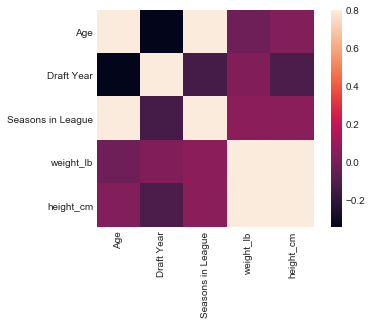

In [66]:
NBA_corrmat = NBA_closeup.corr()
print(NBA_corrmat)
sns.heatmap(NBA_corrmat, vmax=.8, square=True)
plt.show()

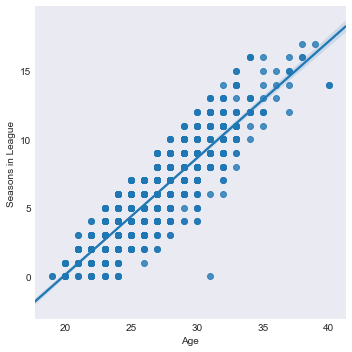

In [51]:
sns.lmplot(x='Age',y='Seasons in League',data=NBA_closeup)

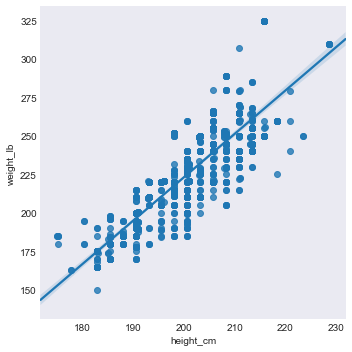

In [67]:
sns.lmplot(x='height_cm',y='weight_lb',data=NBA_closeup)

## Feature Engineering

In [75]:
features = pd.get_dummies(NBA_closeup['Age'])
features['Veteran']=np.where(df['Age']>=30, 1, 0)
print(pd.crosstab(features['Veteran'], df['Age']))

Age      19  20  21  22   23   24   25   26   27   28 ...  31  32  33  34  35  \
Veteran                                               ...                       
0         2  11  25  57  101  116  145  120  126  127 ...   0   0   0   0   0   
1         0   0   0   0    0    0    0    0    0    0 ...  57  42  30  15   8   

Age      36  37  38  39  40  
Veteran                      
0         0   0   0   0   0  
1         3   5   3   1   2  

[2 rows x 22 columns]


In [80]:
print(NBA_closeup.height_cm.unique())

features = pd.get_dummies(NBA_closeup['height_cm'])
features['tall']=np.where(NBA_closeup['height_cm']>=195,1,0)
print(pd.crosstab(features['tall'], NBA_closeup['height_cm']))

[195.58 198.12 218.44 205.74 193.04 190.5  200.66 210.82 187.96 185.42
 208.28 213.36 203.2  177.8  215.9  182.88 223.52 220.98 180.34 228.6
 175.26 206.   191.   201.   196.   213.   193.   185.   203.   208.
 175.   211.   216.   183.   221.  ]
height_cm  175.00  175.26  177.80  180.34  182.88  183.00  185.00  185.42  \
tall                                                                        
0               2       4       2       4      49       1       3      34   
1               0       0       0       0       0       0       0       0   

height_cm  187.96  190.50   ...    211.00  213.00  213.36  215.90  216.00  \
tall                        ...                                             
0              23      99   ...         0       0       0       0       0   
1               0       0   ...         6       6      65      37       1   

height_cm  218.44  220.98  221.00  223.52  228.60  
tall                                               
0               0       0      

In [85]:
features = pd.get_dummies(NBA_closeup['weight_lb'])
features['heavy']=np.where(NBA_closeup['weight_lb']>=210,1,0)
print(pd.crosstab(features['heavy'], NBA_closeup['weight_lb']))

weight_lb  150.000000  163.000000  165.000000  168.000000  170.000000  \
heavy                                                                   
0                   1           2          24           1          15   
1                   0           0           0           0           0   

weight_lb  174.165187  175.000000  178.000000  180.000000  182.983678  \
heavy                                                                   
0                   3          20           8          24           1   
1                   0           0           0           0           0   

weight_lb     ...      268.963960  270.000000  279.000000  279.987073  \
heavy         ...                                                       
0             ...               0           0           0           0   
1             ...               2           4           3           1   

weight_lb  280.000000  285.000000  289.000000  307.000000  310.000000  \
heavy                                           

In [102]:
print(NBA_closeup['Draft Year'].mean())
features = pd.get_dummies(NBA_closeup['Draft Year'])
features['Old Timer']=np.where(NBA_closeup['Draft Year']>=1997,1,0)
print(pd.crosstab(features['Old Timer'], NBA_closeup['Draft Year']))

1997.2445414847161
Draft Year  1969  1972  1974  1975  1976  1977  1978  1979  1980  1981  ...   \
Old Timer                                                               ...    
0              1     1     1     1     9     4     9    15     3    14  ...    
1              0     0     0     0     0     0     0     0     0     0  ...    

Draft Year  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
Old Timer                                                               
0              0     0     0     0     0     0     0     0     0     0  
1             34    35    53    23    32    18     7     5     4     1  

[2 rows x 45 columns]


In [112]:
print(NBA_closeup['Seasons in League'].mean())
features = pd.get_dummies(NBA_closeup['Seasons in League'])
features['Seasoned']=NBA_closeup['Seasons in League']>=6
print(pd.crosstab(features['Seasoned'], NBA_closeup['Seasons in League']))

5.869868995633188
Seasons in League  0   1   2    3    4    5    6    7   8   9   10  11  12  \
Seasoned                                                                     
False              26  49  96  120  141  140    0    0   0   0   0   0   0   
True                0   0   0    0    0    0  137  108  99  78  43  34  34   

Seasons in League  13  14  15  16  17  
Seasoned                               
False               0   0   0   0   0  
True               14  11   6   7   2  


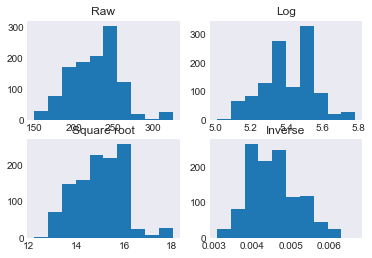

In [113]:
#four-panel plot
fig = plt.figure()

fig.add_subplot(221)
plt.hist(NBA_closeup['weight_lb'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(NBA_closeup['weight_lb'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(NBA_closeup['weight_lb'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/NBA_closeup['weight_lb'].dropna())
plt.title('Inverse')
plt.show()

features['log_weight_lb'] = np.log(NBA_closeup['weight_lb'])